<a href="https://colab.research.google.com/github/thearmankarapetyan/Data-Collection-Analysis-Model-Development/blob/main/MiniProjects_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 5. Mini Project: Real Estate Data Collection and Analysis

##Scraping


In [ ]:
import aiohttp
import asyncio
from bs4 import BeautifulSoup
import nest_asyncio
import json

In [ ]:
# Allowing the use of nested asynchronous event loops
nest_asyncio.apply()

In [ ]:
#A function for making an async(allowing parallelism) http.get requests
async def fetch(session, url, headers):
    async with session.get(url, headers=headers) as response:
        return await response.text()

In [ ]:
async def scrape_page(session, url, headers):
    items_data = []

    response = await fetch(session, url, headers)
    soup = BeautifulSoup(response, 'html.parser')

    content_div = soup.find('div', id='contentr')

    if content_div:
        dl_divs = content_div.find_all('div', class_='dl') + content_div.find('div', id='tp').find_all('div', class_='dl')


        if dl_divs:
            # dl_div = dl_divs[0] + dl_divs[1]
            dl_div = dl_divs[1]
            # dl_div = str(dl_divs[0].value) + str(dl_divs[1].value)

            items_cont = dl_div.find_all('a')

            for item in items_cont:
                pl_div = item.find('div')

                if pl_div:
                    description_div = pl_div.find('div')

                    if description_div:
                        description = description_div.text.strip()

                        price_div = item.find('div', class_='p')

                        if price_div:
                            price = price_div.text.strip().split(' ')[0].strip()

                            location_div = item.find('div', class_='at')

                            if location_div:
                                location = location_div.text.strip().split(',')[0].strip()

                                category_div = item.find('div', class_='c')

                                if category_div:
                                    category = category_div.text.strip().split('›')[0].strip()

                                    if '$' not in price:
                                        price_num = int(''.join(filter(str.isdigit, price)))
                                        price_usd = round(price_num / 405.68, 2)
                                        price_f = f"${price_usd}"
                                    else:
                                        price_f = price

                                    item_data = {
                                        "Description": description,
                                        "Price": price_f,
                                        "Location": location,
                                        "Category": category
                                    }

                                    items_data.append(item_data)

    return items_data


In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'
}
base_url = "https://www.list.am/en/category/54/"

async with aiohttp.ClientSession() as session:
    tasks = []

    # Loop through pages 1 to 249
    for page_number in range(1, 250):
        url = f"{base_url}{page_number}"
        tasks.append(scrape_page(session, url, headers))

    results = await asyncio.gather(*tasks)

# Combine results from all pages (modify as needed)
items_data = []
for result in results:
    if result:
        items_data.extend(result)


In [ ]:
# url = "https://www.list.am/en/category/54"
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
# # Asynchronously creating a client session using aiohttp
# async with aiohttp.ClientSession() as session:
#     tasks = [scrape_page(session, url, headers) for _ in range(1000)]
#     # Using asyncio.gather to parallely execute the tasks and await the results
#     results = await asyncio.gather(*tasks)

# # Combining the results into a single list
# items_data = [item for result in results if result for item in result]

In [ ]:
#Writing the scraped data to a JSON file
with open('output_data.json', 'w', encoding = 'utf-8') as json_file:
  json.dump(items_data, json_file, ensure_ascii = False, indent = 2)

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving output_data (1).json to output_data (1).json


In [ ]:
import json
#Reading the data from the JSON file
with open('output_data (1).json', 'r') as json_file:
  data = json.load(json_file)

In [ ]:
# from google.colab import files; files.download('output_data.json')

In [ ]:
data

[{'Description': 'Two story stone house, Զորավար Անդրանիկի փողոց in Echmiadzin, 530 sq.m., 2 bathrooms',
  'Price': '$85,000',
  'Location': 'Echmiadzin',
  'Category': 'For Sale'},
 {'Description': 'Retail Space on Baghramyan street in Echmiadzin, 35 sq.m.',
  'Price': '$739.5',
  'Location': 'Echmiadzin',
  'Category': 'Long Term Rentals'},
 {'Description': 'Functioning Business, Մարշալ Բաղրամյան փողոց in Aparan, 770 sq.m.',
  'Price': '$450,000',
  'Location': 'Aparan',
  'Category': 'For Sale'},
 {'Description': '3 room apartment on Khaghag Don street, 70 sq.m., second to last floor, designer renovation',
  'Price': '$155,000',
  'Location': 'Erebuni',
  'Category': 'For Sale'},
 {'Description': '3 room apartment on Shahumyan 1st street, 69 sq.m., 2/5 floor, partial renovation, stone building',
  'Price': '$493.0',
  'Location': 'Malatia-Sebastia',
  'Category': 'Long Term Rentals'},
 {'Description': 'Single story stone house, Myasnikyan avenue in the center, 65 sq.m., major renova

##Data Cleaning

In [ ]:
import pandas as pd

#Creating a Dataframe from the provided data
df = pd.DataFrame(data)

#Displaying first few rows for an overview
df.head()

,Description,Price,Location,Category
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","$85,000",Echmiadzin,For Sale
1,Retail Space on Baghramyan street in Echmiadzi...,$739.5,Echmiadzin,Long Term Rentals
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","$450,000",Aparan,For Sale
3,"3 room apartment on Khaghag Don street, 70 sq....","$155,000",Erebuni,For Sale
4,"3 room apartment on Shahumyan 1st street, 69 s...",$493.0,Malatia-Sebastia,Long Term Rentals


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19357 entries, 0 to 19356
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  19357 non-null  object
 1   Price        19357 non-null  object
 2   Location     19357 non-null  object
 3   Category     19357 non-null  object
dtypes: object(4)
memory usage: 605.0+ KB


In [ ]:
#Checking if there are any duplicate rows
df.duplicated().any()

True

In [ ]:
df.count()

Description    19357
Price          19357
Location       19357
Category       19357
dtype: int64

In [ ]:
#Dropping the duplicate rows
df.drop_duplicates(inplace = True)

In [ ]:
#Recheking for duplicate rows
df.duplicated().any()

False

In [ ]:
df.count()

Description    19185
Price          19185
Location       19185
Category       19185
dtype: int64

In [ ]:
#checking for NA values
df.isna().any()

Description    False
Price          False
Location       False
Category       False
dtype: bool

##Data Preprocessing

###Feature Engineering:

In [ ]:
import pandas as pd
import re

In [ ]:
#Defining a function to classify the type of the property based on its description
def classify_property(description):
  if 'apartment' in description.lower():
    return 'Apartment'
  elif 'house' in description.lower():
    return 'House'
  elif 'garage' in description.lower():
    return 'Garage'
  elif 'office' in description.lower():
    return 'Office'
  elif 'plot' in description.lower():
    return 'Plot'
  else:
    return 'Other'

In [ ]:
#Creating new columns Area_sqm, Property_Type, Renovated, etc. by extracting relevant information from the Description column
df['Area_sqm'] = df['Description'].apply(lambda x: int(re.findall(r'(\d+) sq.m', x)[0]) if re.search(r'(\d+) sq.m', x) else 0)

In [ ]:
df['Property_Type'] = df['Description'].apply(classify_property)

In [ ]:
df['Renovated'] = df['Description'].apply(lambda x: 1 if 'renovation' in x.lower() else 0)

In [ ]:
df['Price_Numeric'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df['Num_Rooms'] = df.apply(lambda row: (int(re.findall(r'(\d+) room', row['Description'])[0]) if re.search(r'(\d+) room', row['Description'])
                                       else (int(re.findall(r'(\d+) sq.m.', row['Description'])[0]) // 25) + 1 # Applying the formula for number of rooms
                                         if re.search(r'(\d+) sq.m.', row['Description']) and row['Property_Type'] in ['Office Space', 'House', 'Apartment']
                                         else None),
                           axis=1)

In [ ]:
#Median price of all properties
median_price = df['Price_Numeric'].median()

In [ ]:
#Creating a column of high price area where 1 indicates high price area 0 not high price area
df['High_Price_Area'] = df['Price_Numeric'].apply(lambda x: 1 if x > median_price else 0)

In [ ]:
df['Family_Size'] = df['Num_Rooms'].fillna(0) + df.get('Num_Bathrooms', 0)

In [ ]:
#A column that indicates whether the property is suitable for single occupancy or not
df['Single_Occupancy'] = df['Family_Size'].apply(lambda x: 1 if x <= 1 else 0)

<Axes: title={'center': 'Single vs Multiple Occupancy'}>

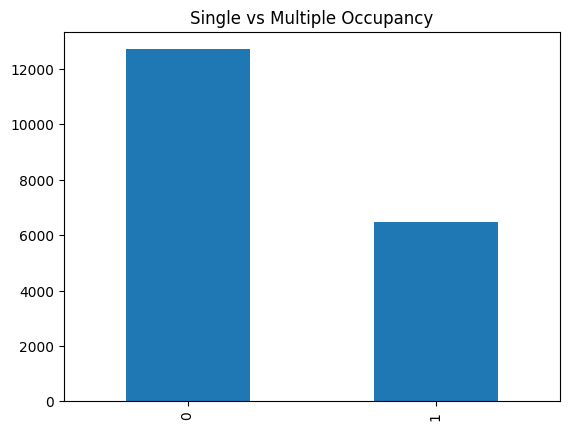

In [ ]:
df['Single_Occupancy'].value_counts().plot(title='Single vs Multiple Occupancy', kind='bar')

###Data Transformation:

In [ ]:
df

,Description,Price,Location,Category,Area_sqm,Property_Type,Renovated,Price_Numeric,Num_Rooms,High_Price_Area,Family_Size,Single_Occupancy
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","$85,000",Echmiadzin,For Sale,530,House,0,85000.00,22.0,1,22.0,0
1,Retail Space on Baghramyan street in Echmiadzi...,$739.5,Echmiadzin,Long Term Rentals,35,Other,0,739.50,NaN,0,0.0,1
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","$450,000",Aparan,For Sale,770,Other,0,450000.00,NaN,1,0.0,1
3,"3 room apartment on Khaghag Don street, 70 sq....","$155,000",Erebuni,For Sale,70,Apartment,1,155000.00,3.0,1,3.0,0
4,"3 room apartment on Shahumyan 1st street, 69 s...",$493.0,Malatia-Sebastia,Long Term Rentals,69,Apartment,1,493.00,3.0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19352,"2 room apartment in a new building, Buzand St,...","$1,000",Kentron,Long Term Rentals,60,Apartment,0,1000.00,2.0,0,2.0,0
19353,Office Space on Mamikonyants street in Arabkir...,$616.25,Arabkir,Long Term Rentals,40,Office,0,616.25,NaN,0,0.0,1
19354,"3 room apartment on Griboyedov street, 82 sq.m...","$180,000",Arabkir,For Sale,82,Apartment,1,180000.00,3.0,1,3.0,0
19355,"3 room apartment on Nar-Dos street, 95 sq.m., ...","$200,000",Kentron,For Sale,95,Apartment,1,200000.00,3.0,1,3.0,0


In [ ]:
#Checking for missing values in each column of 'df'
df.isna().any()

Description         False
Price               False
Location            False
Category            False
Area_sqm            False
Property_Type       False
Renovated           False
Price_Numeric       False
Num_Rooms            True
High_Price_Area     False
Family_Size         False
Single_Occupancy    False
dtype: bool

In [ ]:
#Filling any missing values in 'df' with 0
df.fillna(0, inplace = True)

In [ ]:
#Re-checking  for missing values
df.isna().any()

Description         False
Price               False
Location            False
Category            False
Area_sqm            False
Property_Type       False
Renovated           False
Price_Numeric       False
Num_Rooms           False
High_Price_Area     False
Family_Size         False
Single_Occupancy    False
dtype: bool

In [ ]:
df

,Description,Price,Location,Category,Area_sqm,Property_Type,Renovated,Price_Numeric,Num_Rooms,High_Price_Area,Family_Size,Single_Occupancy
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","$85,000",Echmiadzin,For Sale,530,House,0,85000.00,22.0,1,22.0,0
1,Retail Space on Baghramyan street in Echmiadzi...,$739.5,Echmiadzin,Long Term Rentals,35,Other,0,739.50,0.0,0,0.0,1
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","$450,000",Aparan,For Sale,770,Other,0,450000.00,0.0,1,0.0,1
3,"3 room apartment on Khaghag Don street, 70 sq....","$155,000",Erebuni,For Sale,70,Apartment,1,155000.00,3.0,1,3.0,0
4,"3 room apartment on Shahumyan 1st street, 69 s...",$493.0,Malatia-Sebastia,Long Term Rentals,69,Apartment,1,493.00,3.0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19352,"2 room apartment in a new building, Buzand St,...","$1,000",Kentron,Long Term Rentals,60,Apartment,0,1000.00,2.0,0,2.0,0
19353,Office Space on Mamikonyants street in Arabkir...,$616.25,Arabkir,Long Term Rentals,40,Office,0,616.25,0.0,0,0.0,1
19354,"3 room apartment on Griboyedov street, 82 sq.m...","$180,000",Arabkir,For Sale,82,Apartment,1,180000.00,3.0,1,3.0,0
19355,"3 room apartment on Nar-Dos street, 95 sq.m., ...","$200,000",Kentron,For Sale,95,Apartment,1,200000.00,3.0,1,3.0,0


In [ ]:
#Changing the data type of the 'Num_Rooms' column to integer
df['Num_Rooms']=df['Num_Rooms'].astype(int)

In [ ]:
#Changing the data type of the 'Family_Size' column to integer
df['Family_Size']=df['Family_Size'].astype(int)

In [ ]:
df


,Description,Price,Location,Category,Area_sqm,Property_Type,Renovated,Price_Numeric,Num_Rooms,High_Price_Area,Family_Size,Single_Occupancy
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","$85,000",Echmiadzin,For Sale,530,House,0,85000.00,22,1,22,0
1,Retail Space on Baghramyan street in Echmiadzi...,$739.5,Echmiadzin,Long Term Rentals,35,Other,0,739.50,0,0,0,1
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","$450,000",Aparan,For Sale,770,Other,0,450000.00,0,1,0,1
3,"3 room apartment on Khaghag Don street, 70 sq....","$155,000",Erebuni,For Sale,70,Apartment,1,155000.00,3,1,3,0
4,"3 room apartment on Shahumyan 1st street, 69 s...",$493.0,Malatia-Sebastia,Long Term Rentals,69,Apartment,1,493.00,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19352,"2 room apartment in a new building, Buzand St,...","$1,000",Kentron,Long Term Rentals,60,Apartment,0,1000.00,2,0,2,0
19353,Office Space on Mamikonyants street in Arabkir...,$616.25,Arabkir,Long Term Rentals,40,Office,0,616.25,0,0,0,1
19354,"3 room apartment on Griboyedov street, 82 sq.m...","$180,000",Arabkir,For Sale,82,Apartment,1,180000.00,3,1,3,0
19355,"3 room apartment on Nar-Dos street, 95 sq.m., ...","$200,000",Kentron,For Sale,95,Apartment,1,200000.00,3,1,3,0


In [ ]:
#Resetting the index of the Dataframe
df = df.reset_index()

#Dropping the old 'index' column
df=df.drop('index',axis = 'columns')

In [ ]:
df

,Description,Price,Location,Category,Area_sqm,Property_Type,Renovated,Price_Numeric,Num_Rooms,High_Price_Area,Family_Size,Single_Occupancy
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","$85,000",Echmiadzin,For Sale,530,House,0,85000.00,22,1,22,0
1,Retail Space on Baghramyan street in Echmiadzi...,$739.5,Echmiadzin,Long Term Rentals,35,Other,0,739.50,0,0,0,1
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","$450,000",Aparan,For Sale,770,Other,0,450000.00,0,1,0,1
3,"3 room apartment on Khaghag Don street, 70 sq....","$155,000",Erebuni,For Sale,70,Apartment,1,155000.00,3,1,3,0
4,"3 room apartment on Shahumyan 1st street, 69 s...",$493.0,Malatia-Sebastia,Long Term Rentals,69,Apartment,1,493.00,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19180,"2 room apartment in a new building, Buzand St,...","$1,000",Kentron,Long Term Rentals,60,Apartment,0,1000.00,2,0,2,0
19181,Office Space on Mamikonyants street in Arabkir...,$616.25,Arabkir,Long Term Rentals,40,Office,0,616.25,0,0,0,1
19182,"3 room apartment on Griboyedov street, 82 sq.m...","$180,000",Arabkir,For Sale,82,Apartment,1,180000.00,3,1,3,0
19183,"3 room apartment on Nar-Dos street, 95 sq.m., ...","$200,000",Kentron,For Sale,95,Apartment,1,200000.00,3,1,3,0


###Data Encoding:

In [ ]:
df.dtypes

Description          object
Price                object
Location             object
Category             object
Area_sqm              int64
Property_Type        object
Renovated             int64
Price_Numeric       float64
Num_Rooms             int64
High_Price_Area       int64
Family_Size           int64
Single_Occupancy      int64
dtype: object

In [ ]:
#Checking for the class names for the feature 'Category'
df['Category'].unique()

array(['For Sale', 'Long Term Rentals', 'Daily Rentals',
       'New Construction'], dtype=object)

In [ ]:
#Checking for the class names for the feature 'Property_Type'
df['Property_Type'].unique()

array(['House', 'Other', 'Apartment', 'Office', 'Plot', 'Garage'],
      dtype=object)

In [ ]:
#Checking for the class names for the feature 'Location'
df['Location'].unique()

array(['Echmiadzin', 'Aparan', 'Erebuni', 'Malatia-Sebastia', 'Kentron',
       'Vanadzor', 'Gavar', 'Nor Kharberd', 'Hrazdan', 'Arinj', 'Martuni',
       'Shengavit', 'Gyumri', 'Ajapnyak', 'Arabkir', 'Hankavan', 'Avan',
       'Ashtarak', 'Nor Nork', 'Darakert', 'Aragatsavan', 'Abovian',
       'Akunk', 'Proshyan', 'Tsakhkadzor', 'Davitashen', 'Aygek',
       'Artashat', 'Parakar', 'Ptghni', 'Kanaker-Zeytun', 'Pokr Vedi',
       'Karashamb', 'Tsovagyugh', 'Urtsadzor', 'Karmirgyugh',
       'Aragatsotn', 'Dzoraghbyur', 'Geghanist', 'Yeghvard', 'Nor Kyurin',
       'Ayntap', 'Jrarat', 'Masis', 'Musaler', 'Zovuni', 'Dilijan',
       'Shahumyan', 'Armash', 'Sevan', 'Argavand', 'Varser', 'Nor Hachen',
       'Oshakan', 'Mayakovski', 'Baghramyan', 'Gai', 'Getap', 'Nor Geghi',
       'Karbi', 'Arzni', 'Byureghavan', 'Jrvezh', 'Sarukhan', 'Artik',
       'Agarakavan', 'Dashtavan', 'Maralik', 'Parpi', 'Garni',
       'Yeghegnadzor', 'Kotayk', 'Merdzavan', 'Arevabuyr', 'Stepanavan',
       'Nor

In [ ]:
#Creating one-hot encoded variables for 'Category','Property_Type' and 'Location' columns
dummies = pd.get_dummies(df[['Category','Property_Type','Location']])

In [ ]:
#Concatenating the original dataframe and the new variables into df_encoded dataframe
df_encoded = pd.concat([df,dummies],axis='columns')
df_encoded

,Description,Price,Location,Category,Area_sqm,Property_Type,Renovated,Price_Numeric,Num_Rooms,High_Price_Area,...,Location_Yeraskh,Location_Yernjatap,Location_Zar,Location_Zartonk,Location_Zolakar,Location_Zorak,Location_Zoravan,Location_Zovaber,Location_Zovk,Location_Zovuni
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","$85,000",Echmiadzin,For Sale,530,House,0,85000.00,22,1,...,0,0,0,0,0,0,0,0,0,0
1,Retail Space on Baghramyan street in Echmiadzi...,$739.5,Echmiadzin,Long Term Rentals,35,Other,0,739.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","$450,000",Aparan,For Sale,770,Other,0,450000.00,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"3 room apartment on Khaghag Don street, 70 sq....","$155,000",Erebuni,For Sale,70,Apartment,1,155000.00,3,1,...,0,0,0,0,0,0,0,0,0,0
4,"3 room apartment on Shahumyan 1st street, 69 s...",$493.0,Malatia-Sebastia,Long Term Rentals,69,Apartment,1,493.00,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19180,"2 room apartment in a new building, Buzand St,...","$1,000",Kentron,Long Term Rentals,60,Apartment,0,1000.00,2,0,...,0,0,0,0,0,0,0,0,0,0
19181,Office Space on Mamikonyants street in Arabkir...,$616.25,Arabkir,Long Term Rentals,40,Office,0,616.25,0,0,...,0,0,0,0,0,0,0,0,0,0
19182,"3 room apartment on Griboyedov street, 82 sq.m...","$180,000",Arabkir,For Sale,82,Apartment,1,180000.00,3,1,...,0,0,0,0,0,0,0,0,0,0
19183,"3 room apartment on Nar-Dos street, 95 sq.m., ...","$200,000",Kentron,For Sale,95,Apartment,1,200000.00,3,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Dropping the old column 'Category'
df_encoded = df_encoded.drop(['Category'], axis='columns')

In [ ]:
df_encoded

,Description,Price,Location,Area_sqm,Property_Type,Renovated,Price_Numeric,Num_Rooms,High_Price_Area,Family_Size,...,Location_Yeraskh,Location_Yernjatap,Location_Zar,Location_Zartonk,Location_Zolakar,Location_Zorak,Location_Zoravan,Location_Zovaber,Location_Zovk,Location_Zovuni
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","$85,000",Echmiadzin,530,House,0,85000.00,22,1,22,...,0,0,0,0,0,0,0,0,0,0
1,Retail Space on Baghramyan street in Echmiadzi...,$739.5,Echmiadzin,35,Other,0,739.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","$450,000",Aparan,770,Other,0,450000.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"3 room apartment on Khaghag Don street, 70 sq....","$155,000",Erebuni,70,Apartment,1,155000.00,3,1,3,...,0,0,0,0,0,0,0,0,0,0
4,"3 room apartment on Shahumyan 1st street, 69 s...",$493.0,Malatia-Sebastia,69,Apartment,1,493.00,3,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19180,"2 room apartment in a new building, Buzand St,...","$1,000",Kentron,60,Apartment,0,1000.00,2,0,2,...,0,0,0,0,0,0,0,0,0,0
19181,Office Space on Mamikonyants street in Arabkir...,$616.25,Arabkir,40,Office,0,616.25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19182,"3 room apartment on Griboyedov street, 82 sq.m...","$180,000",Arabkir,82,Apartment,1,180000.00,3,1,3,...,0,0,0,0,0,0,0,0,0,0
19183,"3 room apartment on Nar-Dos street, 95 sq.m., ...","$200,000",Kentron,95,Apartment,1,200000.00,3,1,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.dtypes

Description         object
Price               object
Location            object
Area_sqm             int64
Property_Type       object
                     ...  
Location_Zorak       uint8
Location_Zoravan     uint8
Location_Zovaber     uint8
Location_Zovk        uint8
Location_Zovuni      uint8
Length: 435, dtype: object

###Data Reduction:

In [ ]:
threshold_correlation = 0.8

#Calculating each feature's variance
feature_variances = df_encoded.var()

<ipython-input-44-c633b9aedd14>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_variances = df_encoded.var()


In [ ]:
#Taking the lowest variance feature
lowest_variance_feature = feature_variances.idxmin()

if lowest_variance_feature:
  #Dropping the feature with the lowest variance
  df_reduced = df_encoded.drop(f'{lowest_variance_feature}',axis='columns')

In [ ]:
correlation_matrix = df_reduced.corr()
max_corr_value = 0
feature_to_drop = None

<ipython-input-46-363bad8ccb80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_reduced.corr()


In [ ]:
#Iterating through the matrix to find highly correlated features
for i in correlation_matrix.columns:
  for j in correlation_matrix.columns:
    #Finding the max correlation pair
    if i!=j and abs(correlation_matrix[i][j]) > threshold_correlation and abs(correlation_matrix[i][j]) > max_corr_value:
      i_corr_sum = correlation_matrix[i].abs().sum()
      j_corr_sum = correlation_matrix[j].abs().sum()
      max_corr_value = abs(correlation_matrix[i][j])
      feature_to_drop = i if i_corr_sum < j_corr_sum else j

In [ ]:
#Dropping the feature with the highest correlationn
if feature_to_drop:
  df_reduced.drop(f'{feature_to_drop}',axis=1,inplace=True)

In [ ]:
feature_to_drop

'Family_Size'

In [ ]:
df_reduced

,Description,Price,Location,Area_sqm,Property_Type,Renovated,Price_Numeric,Num_Rooms,High_Price_Area,Single_Occupancy,...,Location_Yeraskh,Location_Yernjatap,Location_Zar,Location_Zartonk,Location_Zolakar,Location_Zorak,Location_Zoravan,Location_Zovaber,Location_Zovk,Location_Zovuni
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","$85,000",Echmiadzin,530,House,0,85000.00,22,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Retail Space on Baghramyan street in Echmiadzi...,$739.5,Echmiadzin,35,Other,0,739.50,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","$450,000",Aparan,770,Other,0,450000.00,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,"3 room apartment on Khaghag Don street, 70 sq....","$155,000",Erebuni,70,Apartment,1,155000.00,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"3 room apartment on Shahumyan 1st street, 69 s...",$493.0,Malatia-Sebastia,69,Apartment,1,493.00,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19180,"2 room apartment in a new building, Buzand St,...","$1,000",Kentron,60,Apartment,0,1000.00,2,0,0,...,0,0,0,0,0,0,0,0,0,0
19181,Office Space on Mamikonyants street in Arabkir...,$616.25,Arabkir,40,Office,0,616.25,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19182,"3 room apartment on Griboyedov street, 82 sq.m...","$180,000",Arabkir,82,Apartment,1,180000.00,3,1,0,...,0,0,0,0,0,0,0,0,0,0
19183,"3 room apartment on Nar-Dos street, 95 sq.m., ...","$200,000",Kentron,95,Apartment,1,200000.00,3,1,0,...,0,0,0,0,0,0,0,0,0,0


###Handling Imbalanced Data:

In [ ]:
#Splitting the DataFrame into features (X) and target variable (y) for the model
X = df_reduced.drop(['Renovated'], axis = 'columns')
y = df_reduced['Renovated']

In [ ]:
# Displaying the number of Renovated
y.value_counts()

0    11482
1     7703
Name: Renovated, dtype: int64

<Axes: ylabel='Renovated'>

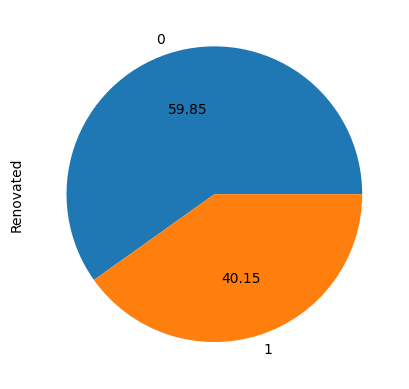

In [ ]:
# Plotting 'y' as a pie chart
y.value_counts().plot.pie(autopct='%.2f')

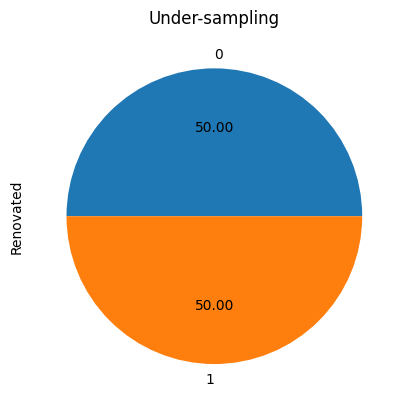

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

#Creating an instance of RandomUnderSampler with a sampling strategy to equalize class distribution
rus = RandomUnderSampler(sampling_strategy=1)

#Applying the under-sampling
X_res, y_res =rus.fit_resample(X, y)

#Plotting the distribution of the resampled data
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Under-sampling")


In [ ]:
#This can be useful for the possible future model
y_res.value_counts()

0    7703
1    7703
Name: Renovated, dtype: int64

###Text Data Preprocessing:

In [ ]:
#This can be useful for the possible future model
#A function that splits text into words
def tokenization(text):
  tokens = re.split(r'\W+',text)
  return tokens

In [ ]:
#Applying tokenization on the column 'Description' and inserting it right next to it
df_reduced.insert(1,'Description_tokenied',df_reduced['Description'].apply(lambda x: tokenization(x)))

In [ ]:
df_reduced

,Description,Description_tokenied,Price,Location,Area_sqm,Property_Type,Renovated,Price_Numeric,Num_Rooms,High_Price_Area,...,Location_Yeraskh,Location_Yernjatap,Location_Zar,Location_Zartonk,Location_Zolakar,Location_Zorak,Location_Zoravan,Location_Zovaber,Location_Zovk,Location_Zovuni
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","[Two, story, stone, house, Զորավար, Անդրանիկի,...","$85,000",Echmiadzin,530,House,0,85000.00,22,1,...,0,0,0,0,0,0,0,0,0,0
1,Retail Space on Baghramyan street in Echmiadzi...,"[Retail, Space, on, Baghramyan, street, in, Ec...",$739.5,Echmiadzin,35,Other,0,739.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","[Functioning, Business, Մարշալ, Բաղրամյան, փող...","$450,000",Aparan,770,Other,0,450000.00,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"3 room apartment on Khaghag Don street, 70 sq....","[3, room, apartment, on, Khaghag, Don, street,...","$155,000",Erebuni,70,Apartment,1,155000.00,3,1,...,0,0,0,0,0,0,0,0,0,0
4,"3 room apartment on Shahumyan 1st street, 69 s...","[3, room, apartment, on, Shahumyan, 1st, stree...",$493.0,Malatia-Sebastia,69,Apartment,1,493.00,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19180,"2 room apartment in a new building, Buzand St,...","[2, room, apartment, in, a, new, building, Buz...","$1,000",Kentron,60,Apartment,0,1000.00,2,0,...,0,0,0,0,0,0,0,0,0,0
19181,Office Space on Mamikonyants street in Arabkir...,"[Office, Space, on, Mamikonyants, street, in, ...",$616.25,Arabkir,40,Office,0,616.25,0,0,...,0,0,0,0,0,0,0,0,0,0
19182,"3 room apartment on Griboyedov street, 82 sq.m...","[3, room, apartment, on, Griboyedov, street, 8...","$180,000",Arabkir,82,Apartment,1,180000.00,3,1,...,0,0,0,0,0,0,0,0,0,0
19183,"3 room apartment on Nar-Dos street, 95 sq.m., ...","[3, room, apartment, on, Nar, Dos, street, 95,...","$200,000",Kentron,95,Apartment,1,200000.00,3,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#A function for removing stopwords from the text
def remove_stopwords(text):
  output = [i for i in text if i not in stopwords]
  return output

In [ ]:
#Applying stopword removal on the column 'Description_tokenied' and inserting it right next to it
df_reduced.insert(2,'Description_no_stopwords',df_reduced['Description_tokenied'].apply(lambda x: remove_stopwords(x)))

In [ ]:
df_reduced

,Description,Description_tokenied,Description_no_stopwords,Price,Location,Area_sqm,Property_Type,Renovated,Price_Numeric,Num_Rooms,...,Location_Yeraskh,Location_Yernjatap,Location_Zar,Location_Zartonk,Location_Zolakar,Location_Zorak,Location_Zoravan,Location_Zovaber,Location_Zovk,Location_Zovuni
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","[Two, story, stone, house, Զորավար, Անդրանիկի,...","[Two, story, stone, house, Զորավար, Անդրանիկի,...","$85,000",Echmiadzin,530,House,0,85000.00,22,...,0,0,0,0,0,0,0,0,0,0
1,Retail Space on Baghramyan street in Echmiadzi...,"[Retail, Space, on, Baghramyan, street, in, Ec...","[Retail, Space, Baghramyan, street, Echmiadzin...",$739.5,Echmiadzin,35,Other,0,739.50,0,...,0,0,0,0,0,0,0,0,0,0
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","[Functioning, Business, Մարշալ, Բաղրամյան, փող...","[Functioning, Business, Մարշալ, Բաղրամյան, փող...","$450,000",Aparan,770,Other,0,450000.00,0,...,0,0,0,0,0,0,0,0,0,0
3,"3 room apartment on Khaghag Don street, 70 sq....","[3, room, apartment, on, Khaghag, Don, street,...","[3, room, apartment, Khaghag, Don, street, 70,...","$155,000",Erebuni,70,Apartment,1,155000.00,3,...,0,0,0,0,0,0,0,0,0,0
4,"3 room apartment on Shahumyan 1st street, 69 s...","[3, room, apartment, on, Shahumyan, 1st, stree...","[3, room, apartment, Shahumyan, 1st, street, 6...",$493.0,Malatia-Sebastia,69,Apartment,1,493.00,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19180,"2 room apartment in a new building, Buzand St,...","[2, room, apartment, in, a, new, building, Buz...","[2, room, apartment, new, building, Buzand, St...","$1,000",Kentron,60,Apartment,0,1000.00,2,...,0,0,0,0,0,0,0,0,0,0
19181,Office Space on Mamikonyants street in Arabkir...,"[Office, Space, on, Mamikonyants, street, in, ...","[Office, Space, Mamikonyants, street, Arabkir,...",$616.25,Arabkir,40,Office,0,616.25,0,...,0,0,0,0,0,0,0,0,0,0
19182,"3 room apartment on Griboyedov street, 82 sq.m...","[3, room, apartment, on, Griboyedov, street, 8...","[3, room, apartment, Griboyedov, street, 82, s...","$180,000",Arabkir,82,Apartment,1,180000.00,3,...,0,0,0,0,0,0,0,0,0,0
19183,"3 room apartment on Nar-Dos street, 95 sq.m., ...","[3, room, apartment, on, Nar, Dos, street, 95,...","[3, room, apartment, Nar, Dos, street, 95, sq,...","$200,000",Kentron,95,Apartment,1,200000.00,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [ ]:
#A function for stemming the text
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

In [ ]:
#Applying stemming on the column 'Description_tokenied' and inserting it right next to it
df_reduced.insert(3,'Description_stemmed',df_reduced['Description_tokenied'].apply(lambda x: stemming(x)))

In [ ]:
df_reduced

,Description,Description_tokenied,Description_no_stopwords,Description_stemmed,Price,Location,Area_sqm,Property_Type,Renovated,Price_Numeric,...,Location_Yeraskh,Location_Yernjatap,Location_Zar,Location_Zartonk,Location_Zolakar,Location_Zorak,Location_Zoravan,Location_Zovaber,Location_Zovk,Location_Zovuni
0,"Two story stone house, Զորավար Անդրանիկի փողոց...","[Two, story, stone, house, Զորավար, Անդրանիկի,...","[Two, story, stone, house, Զորավար, Անդրանիկի,...","[two, stori, stone, hous, զորավար, անդրանիկի, ...","$85,000",Echmiadzin,530,House,0,85000.00,...,0,0,0,0,0,0,0,0,0,0
1,Retail Space on Baghramyan street in Echmiadzi...,"[Retail, Space, on, Baghramyan, street, in, Ec...","[Retail, Space, Baghramyan, street, Echmiadzin...","[retail, space, on, baghramyan, street, in, ec...",$739.5,Echmiadzin,35,Other,0,739.50,...,0,0,0,0,0,0,0,0,0,0
2,"Functioning Business, Մարշալ Բաղրամյան փողոց i...","[Functioning, Business, Մարշալ, Բաղրամյան, փող...","[Functioning, Business, Մարշալ, Բաղրամյան, փող...","[function, busi, մարշալ, բաղրամյան, փողոց, in,...","$450,000",Aparan,770,Other,0,450000.00,...,0,0,0,0,0,0,0,0,0,0
3,"3 room apartment on Khaghag Don street, 70 sq....","[3, room, apartment, on, Khaghag, Don, street,...","[3, room, apartment, Khaghag, Don, street, 70,...","[3, room, apart, on, khaghag, don, street, 70,...","$155,000",Erebuni,70,Apartment,1,155000.00,...,0,0,0,0,0,0,0,0,0,0
4,"3 room apartment on Shahumyan 1st street, 69 s...","[3, room, apartment, on, Shahumyan, 1st, stree...","[3, room, apartment, Shahumyan, 1st, street, 6...","[3, room, apart, on, shahumyan, 1st, street, 6...",$493.0,Malatia-Sebastia,69,Apartment,1,493.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19180,"2 room apartment in a new building, Buzand St,...","[2, room, apartment, in, a, new, building, Buz...","[2, room, apartment, new, building, Buzand, St...","[2, room, apart, in, a, new, build, buzand, st...","$1,000",Kentron,60,Apartment,0,1000.00,...,0,0,0,0,0,0,0,0,0,0
19181,Office Space on Mamikonyants street in Arabkir...,"[Office, Space, on, Mamikonyants, street, in, ...","[Office, Space, Mamikonyants, street, Arabkir,...","[offic, space, on, mamikony, street, in, arabk...",$616.25,Arabkir,40,Office,0,616.25,...,0,0,0,0,0,0,0,0,0,0
19182,"3 room apartment on Griboyedov street, 82 sq.m...","[3, room, apartment, on, Griboyedov, street, 8...","[3, room, apartment, Griboyedov, street, 82, s...","[3, room, apart, on, griboyedov, street, 82, s...","$180,000",Arabkir,82,Apartment,1,180000.00,...,0,0,0,0,0,0,0,0,0,0
19183,"3 room apartment on Nar-Dos street, 95 sq.m., ...","[3, room, apartment, on, Nar, Dos, street, 95,...","[3, room, apartment, Nar, Dos, street, 95, sq,...","[3, room, apart, on, nar, do, street, 95, sq, ...","$200,000",Kentron,95,Apartment,1,200000.00,...,0,0,0,0,0,0,0,0,0,0


##Exploratory Data Analysis

###Descriptive Statistics:

In [ ]:
import numpy as np

In [ ]:
#Storing useful numeric columns in numerical_cols
numerical_cols = df_reduced[['Area_sqm','Price_Numeric','Num_Rooms']].select_dtypes(include=[np.number])

#Calculating the mean median mode and standard deviation of numerical columns
mean = numerical_cols.mean()
median = numerical_cols.median()
mode = numerical_cols.mode().iloc[0]
std_dev = numerical_cols.std()

In [ ]:
#Dataframe for storing the results
summary_df = pd.DataFrame({
    'Mean' : mean,
    'Median' : median,
    'Mode' : mode,
    'Standard Deviation' : std_dev
})

In [ ]:
summary_df

,Mean,Median,Mode,Standard Deviation
Area_sqm,436.246495,86.0,60.0,1.083342e+03
Price_Numeric,615279.521081,24000.0,739.5,7.219694e+07
Num_Rooms,3.999583,2.0,0.0,9.705059e+00


###Distribution Analysis:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

In [ ]:
#Selecting columns for visualization
numerical_cols = numerical_cols.columns

In [ ]:
#Defining widths in bins
bin_widths = {
    'Area_sqm' : 50,
    'Price_Numeric' : 5000,
    'Num_Rooms' : 1
}

In [ ]:
#Defining the limits for each column for consistency in plots
x_limits = {
    'Area_sqm' : (0,1000),
    'Price_Numeric' : (0,100000),
    'Num_Rooms' : (0,10)
}

In [ ]:
# # #Looping through each column to create a histogram and box plot
# for col in numerical_cols:
#   fig, axes = plt.subplots(1,2,figsize=(20,5))

#   bins = np.arange(df_reduced[col].min(), df_reduced[col].max() + bin_widths[col], bin_widths[col])

#   sns.histplot(df_reduced[col],bins=bins,kde=True,ax=axes[0])
#   axes[0].set_title(f'Histogram of {col}')
#   axes[0].set_xlim(x_limits[col])
#   sns.boxplot(x=df_reduced[col],ax=axes[1])
#   axes[1].set_title(f'Box Plot of {col}')

#   plt.show()

###Kurtosis:

In [ ]:
#Defining a function to classify the shape of the distribution based on kurtosis
def kurtosis(kurt):
  if kurt > 3:
    shape = 'leptokurtic'
  elif kurt < 3:
    shape = 'platykurtic'
  else:
    shape = 'mesokurtic'
  return shape

In [ ]:
#Calculating and priniting kurtosis for Area_sqm, Price_Numeric and Num_Rooms with their distributions
kurt_area = df_reduced['Area_sqm'].kurt()

In [ ]:
print(f"Area_sqm has kurtosis of {kurt_area} and has {kurtosis(kurt_area)} distribution")

Area_sqm has kurtosis of 25.417819674915847 and has leptokurtic distribution


In [ ]:
kurt_price = df_reduced['Price_Numeric'].kurt()

In [ ]:
print(f"Price_Numeric has kurtosis of {kurt_price} and has {kurtosis(kurt_price)} distribution")

Price_Numeric has kurtosis of 19184.336682029247 and has leptokurtic distribution


In [ ]:
kurt_rooms = df_reduced['Num_Rooms'].kurt()

In [ ]:
print(f"Num_Rooms has kurtosis of {kurt_rooms} and has {kurtosis(kurt_rooms)} distribution")

Num_Rooms has kurtosis of 179.77858931901844 and has leptokurtic distribution


###Skewness:

In [ ]:
#Defining a function to classify the shape of the symmetry based on skeweness
def skewness(skew):
  if skew >= -0.5 and skew <= 0.5:
    info = 'fairly symmetrical'
  elif skew >= -1 and skew <= -0.5 or skew >= 0.5 and skew <= 1:
    info = 'moderately skewed'
  elif skew < -1 or skew > 1:
    info = 'highly skewed'
  return info

In [ ]:
#Calculating and priniting skewness for Area_sqm, Price_Numeric and Num_Rooms with their shapes
skew_area = df_reduced['Area_sqm'].skew()

In [ ]:
print(f"Area_sqm has skewness of {skew_area} and is {skewness(skew_area)}")

Area_sqm has skewness of 4.696292297645346 and is highly skewed


In [ ]:
skew_price = df_reduced['Price_Numeric'].skew()

In [ ]:
print(f"Price_Numeric has skewness of {skew_price} and is {skewness(skew_price)}")

Price_Numeric has skewness of 138.5063378296054 and is highly skewed


In [ ]:
skew_rooms = df_reduced['Num_Rooms'].skew()

In [ ]:
print(f"Num_Rooms has skewness of {skew_rooms} and is {skewness(skew_rooms)}")

Num_Rooms has skewness of 10.344032839024408 and is highly skewed


###Correlation Analysis:

In [ ]:
#Correlation calculation between Area_sqm and Price_Numeric
cormat = df_reduced[['Area_sqm','Price_Numeric']].corr()
round(cormat,2)

,Area_sqm,Price_Numeric
Area_sqm,1.0,-0.0
Price_Numeric,-0.0,1.0


In [ ]:
corr_sens = cormat.loc['Area_sqm','Price_Numeric']

In [ ]:
if corr_sens >= 0.7 and corr_sens <= 0.9:
  corr_level = 'high correlation'
elif corr_sens >= 0.5 and corr_sens <= 0.7:
  corr_level = 'moderate correlation'
else:
  corr_level = 'weak correlation'

<Axes: >

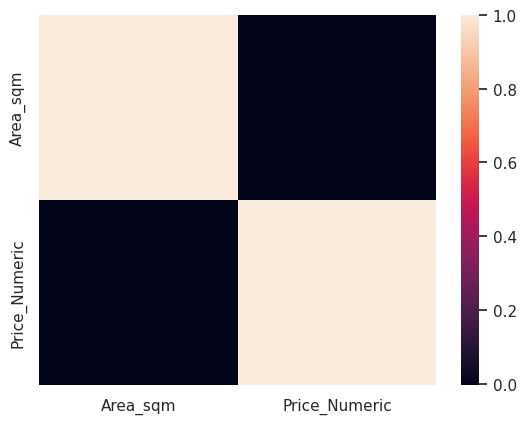

In [ ]:
#Heatmap representation of the correlation
sns.heatmap(cormat)

###Hypothesis Testing:

Hypothesis 0: The distribution of 'Num_Rooms' is symmetrical


Hypothesis 1: The distribution of 'Num_Rooms' is not symmetrical

Test:

In [ ]:
import scipy.stats as stats

In [ ]:
#Performing a one-sample t-test on Num_Rooms
t_stat, p_value = stats.ttest_1samp(df_reduced['Num_Rooms'],summary_df.Median['Num_Rooms'])
print(f'Num_Rooms t-Test: t-stats = {t_stat}, p-value = {p_value}')

Num_Rooms t-Test: t-stats = 28.537908588369174, p-value = 1.813406044591088e-175


In [ ]:
if p_value <= 0.05:
  num_hyp = 'reject the null hypothesis: the distribution of Num_Rooms is not symmetrical'
  print(num_hyp)
else:
  num_hyp = 'fail to reject the null hypothesis'
  print(num_hyp)

reject the null hypothesis: the distribution of Num_Rooms is not symmetrical


<Axes: xlabel='Num_Rooms', ylabel='Count'>

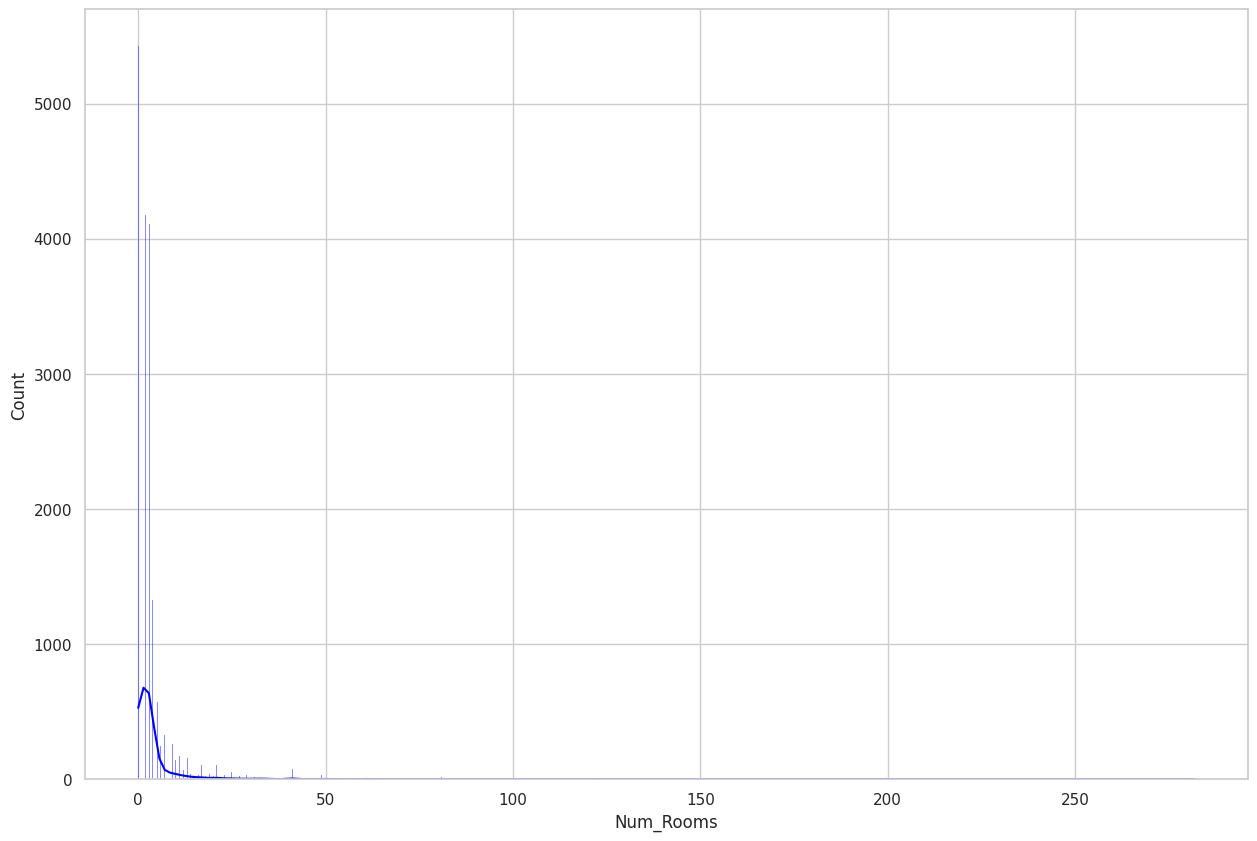

In [ ]:
#Plot for seeing the distribution of Num_Rooms
plt.figure(figsize=(15,10))
sns.histplot(df_reduced['Num_Rooms'], kde=True, color='blue',alpha=0.5)

Hypothesis 0: There is no correlation between 'Area_sqm' and 'Price_Numeric'

Hypothesis 1: There is a significant correlation between 'Area_sqm' and 'Price_Numeric'

Test:

In [ ]:
# Calculating the Pearson correlation coefficient and p-value for testing non-correlation
# between 'Area_sqm' and 'Price_Numeric'
corr_coff, p_value_corr = stats.pearsonr(df_reduced['Area_sqm'],df_reduced['Price_Numeric'])
print(f'Correlation Test: Correlation Coefficient = {corr_coff}, p-value = {p_value_corr}')

Correlation Test: Correlation Coefficient = -0.002347624685567994, p-value = 0.7450686187834695


In [ ]:
if p_value_corr <= 0.05:
  corr_hyp = 'reject the null hypothesis: there is a linear correlation between Area_sqm and Price_Numeric.'
  print(corr_hyp)
else:
  corr_hyp = 'fail to reject the null hypothesis'
  print(corr_hyp)

fail to reject the null hypothesis


<Axes: xlabel='Area_sqm', ylabel='Price_Numeric'>

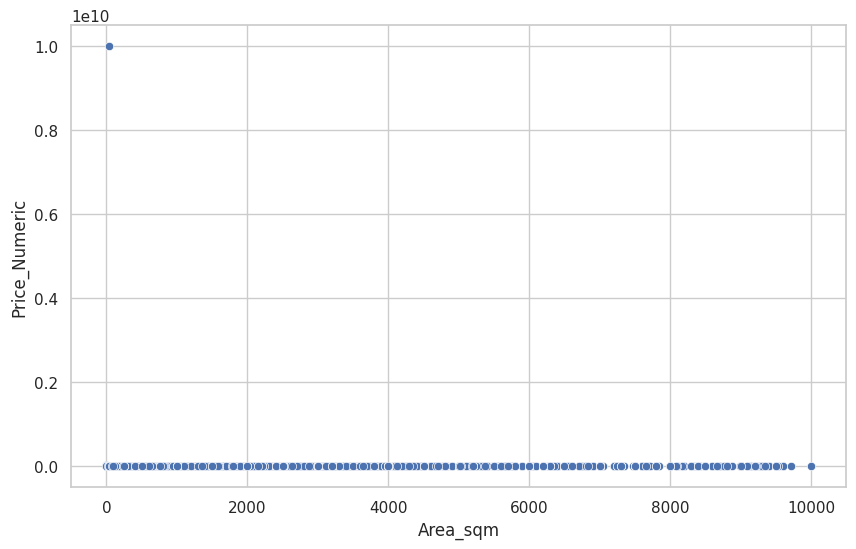

In [ ]:
#Plot for seeing the correlation of between Area_sqm and Price_Numeric
plt.figure(figsize=(10,6))
sns.scatterplot(x='Area_sqm',y="Price_Numeric",data=df_reduced)

##Data Visualization

###Scatter Plots:

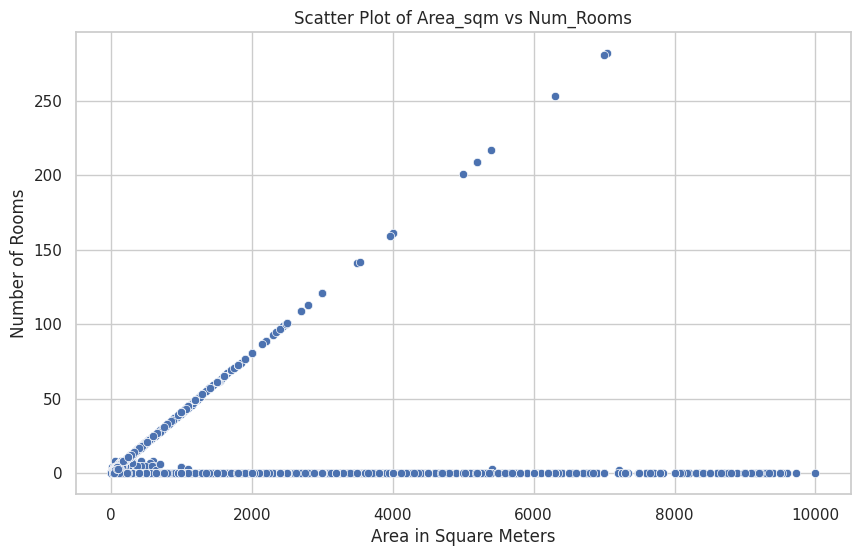

In [ ]:
#Scatter Plots for Area_sqm and Num_Rooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area_sqm', y='Num_Rooms', data=df_reduced)
plt.title('Scatter Plot of Area_sqm vs Num_Rooms')
plt.xlabel('Area in Square Meters')
plt.ylabel('Number of Rooms')
plt.show()

### Histograms and Density Plots:

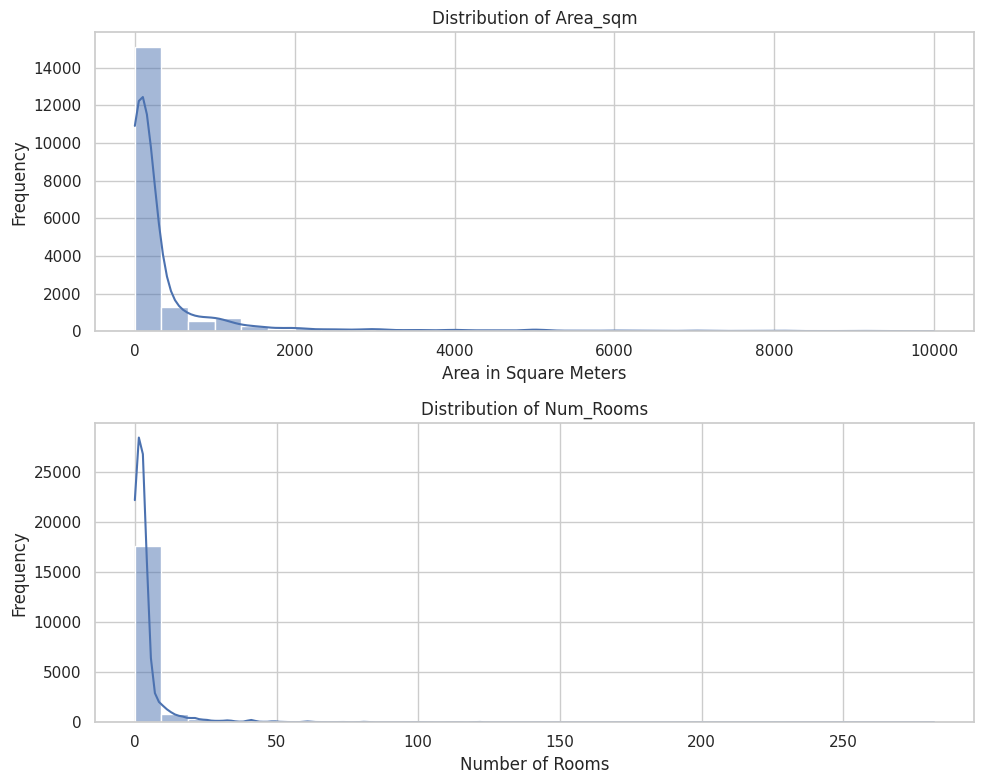

In [ ]:
# Histograms and Density Plots for Area_sqm and Num_Rooms
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(df_reduced['Area_sqm'], kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribution of Area_sqm')
axes[0].set_xlabel('Area in Square Meters')
axes[0].set_ylabel('Frequency')

sns.histplot(df_reduced['Num_Rooms'], kde=True, ax=axes[1], bins=30)
axes[1].set_title('Distribution of Num_Rooms')
axes[1].set_xlabel('Number of Rooms')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Heat Maps:

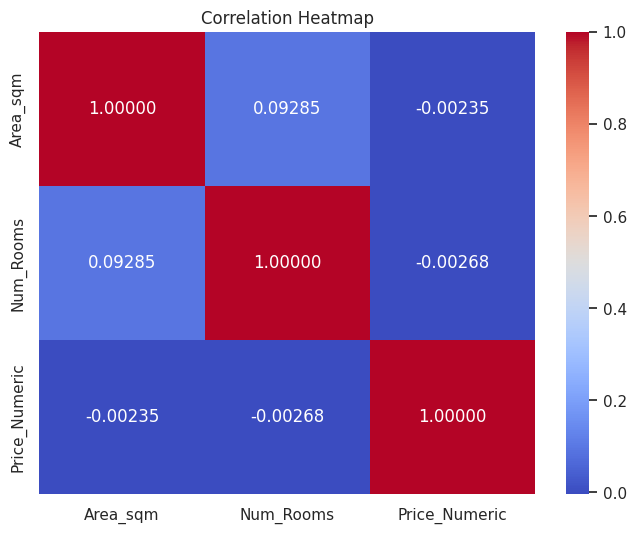

In [ ]:
correlation_matrix=df_reduced[['Area_sqm', 'Num_Rooms', 'Price_Numeric']].corr()

#Heat Maps for Area_Sqm, Num_Rooms, and Price_Numeric
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".5f")

plt.title('Correlation Heatmap')

plt.show()
#The reason why the price is not affected at all by the area size in m^2 or the number of rooms is because it's heavily affected by its location

### Bar Plots:

In [ ]:
categorical_columns = ['Property_Type', 'Location']

<ipython-input-107-1ff6fb626cc7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reduced, x=col, palette= "viridis")


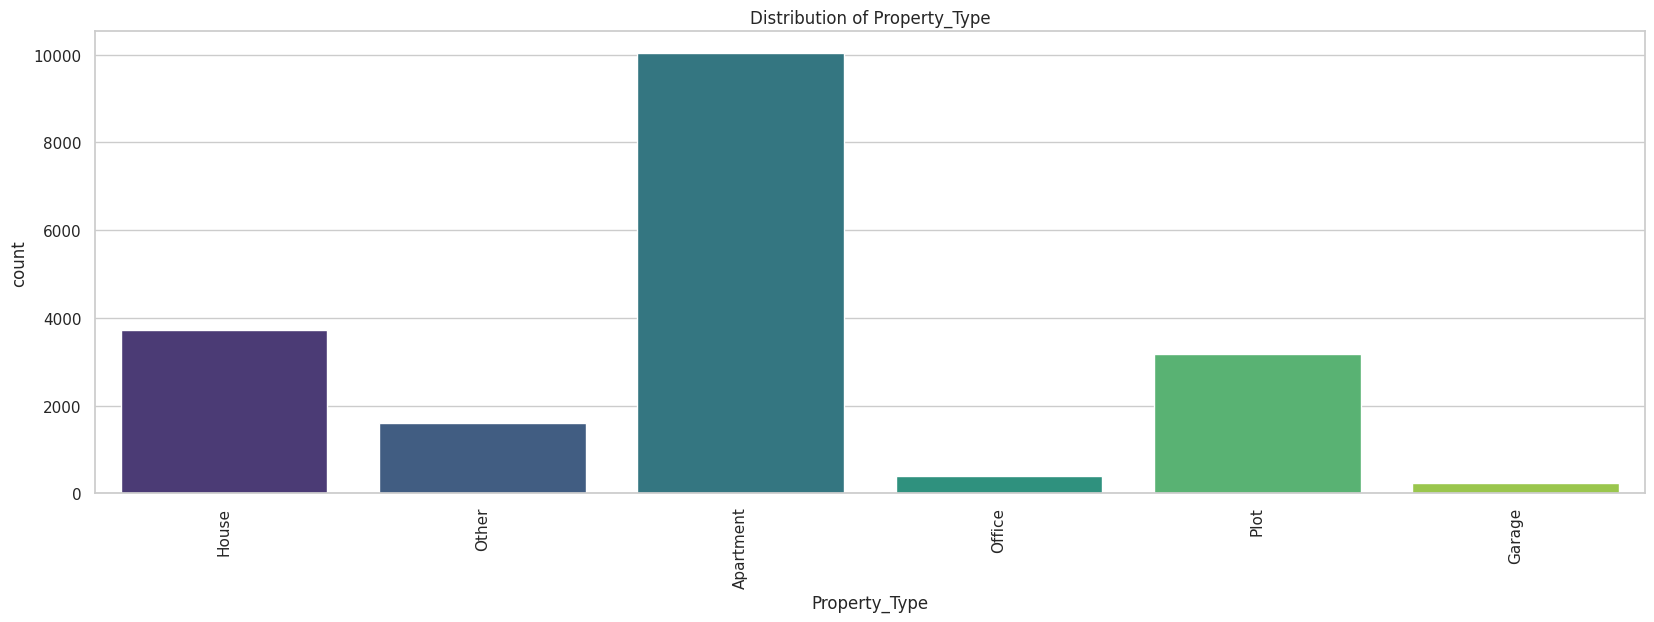

<ipython-input-107-1ff6fb626cc7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reduced, x=col, palette= "viridis")


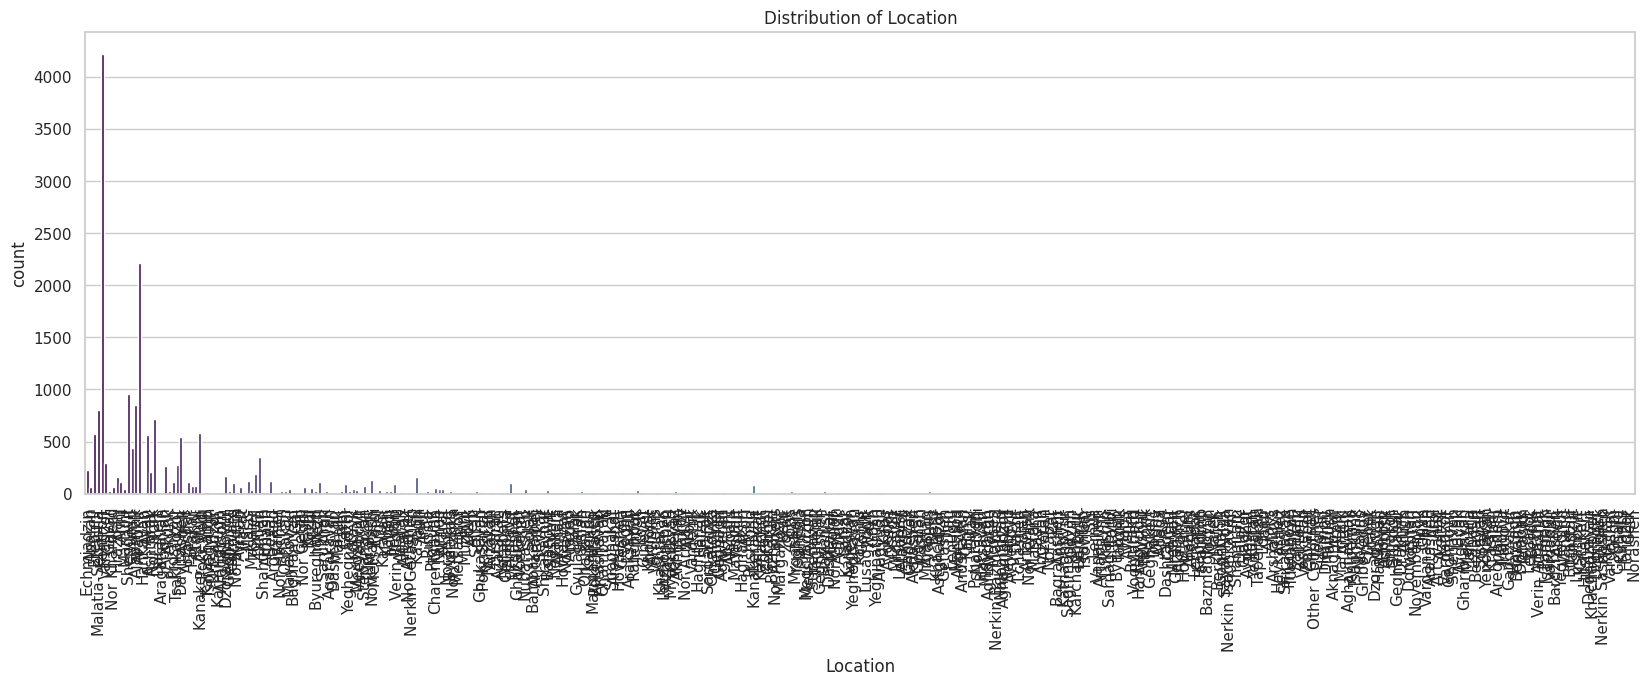

In [ ]:
#Bar Plots for Property_Type and Location
for col in categorical_columns:
  plt.figure(figsize=(20,6))
  sns.countplot(data=df_reduced, x=col, palette= "viridis")
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=90)
  plt.show()

### Box Plots:

In [ ]:
numerical_columns = ['Area_sqm', 'Price_Numeric', 'Num_Rooms']

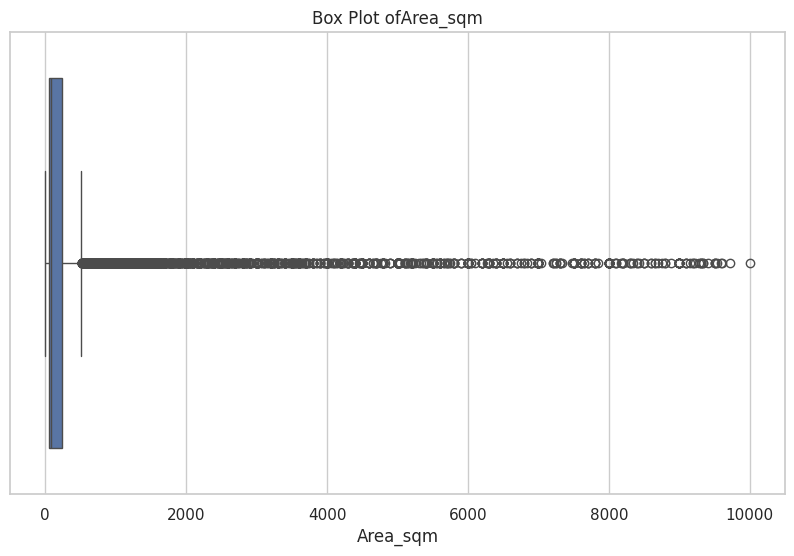

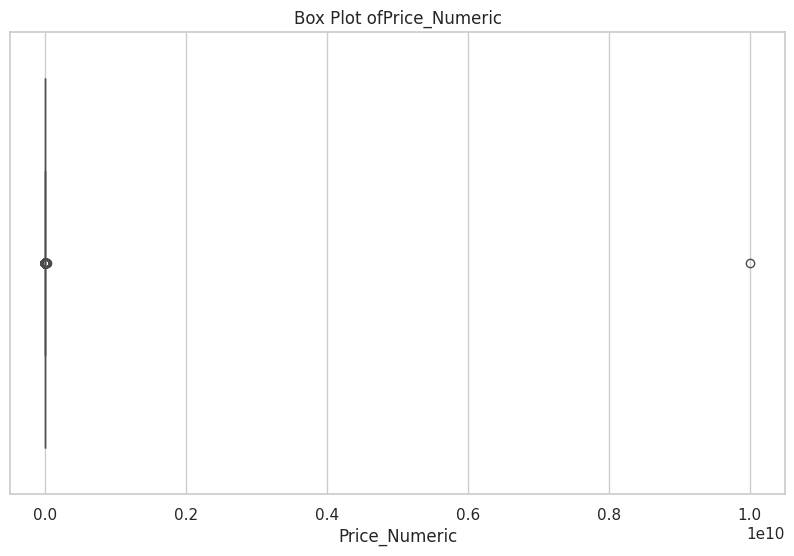

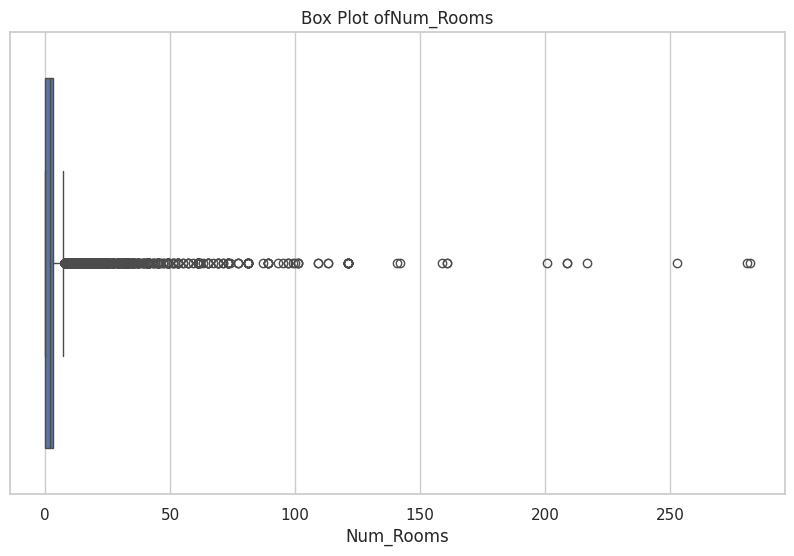

In [ ]:
# Box Plots for Area_Sqm, Price_Numeric, Num_Rooms
for col in numerical_columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=df_reduced, x=col)
  plt.title(f'Box Plot of{col}')
  plt.show

##Results Explanation

In [ ]:
#Function for describing the analyzed data
def stats_show(data,descp):

  print(f"The average size of the {data} being considered is {summary_df.Mean[f'{data}']}\n")

  if summary_df['Standard Deviation'][f'{data}'] > summary_df.Mean[f'{data}']:
    print(f"{data} has a standard deviation of {summary_df['Standard Deviation'][f'{data}']}, this high value suggests that the data might have some very large or very small {descp} compared to the average.\n")

  if summary_df.Mean[f'{data}'] > summary_df.Median[f'{data}']:
    print(f"Also, {data} has a right-skewed distribution.")

  if summary_df.Mean[f'{data}'] < summary_df.Median[f'{data}']:
    print(f"Also, {data} has a left-skewed distribution.")

  if summary_df.Mean[f'{data}'] == summary_df.Median[f'{data}']:
    print(f"Also, {data} has a centered distribution.")

In [ ]:
stats_show('Area_sqm','areas')

The average size of the Area_sqm being considered is 436.24649465728436

Area_sqm has a standard deviation of 1083.34206532895, this high value suggests that the data might have some very large or very small areas compared to the average.

Also, Area_sqm has a right-skewed distribution.


In [ ]:
stats_show('Num_Rooms','rooms')

The average size of the Num_Rooms being considered is 3.999583007557988

Num_Rooms has a standard deviation of 9.70505937509649, this high value suggests that the data might have some very large or very small rooms compared to the average.

Also, Num_Rooms has a right-skewed distribution.


In [ ]:
stats_show('Price_Numeric','prices')

The average size of the Price_Numeric being considered is 615279.5210810528

Price_Numeric has a standard deviation of 72196936.10017331, this high value suggests that the data might have some very large or very small prices compared to the average.

Also, Price_Numeric has a right-skewed distribution.


In [ ]:
print(f"Additionally, Area_sqm has kurtosis of {kurt_area} and has {kurtosis(kurt_area)} distribution\n\nPrice_Numeric has kurtosis of {kurt_price} and has {kurtosis(kurt_price)} distribution\n\nNum_Rooms has kurtosis of {kurt_rooms} and has {kurtosis(kurt_rooms)} distribution")

Additionally, Area_sqm has kurtosis of 25.417819674915847 and has leptokurtic distribution

Price_Numeric has kurtosis of 19184.336682029247 and has leptokurtic distribution

Num_Rooms has kurtosis of 179.77858931901844 and has leptokurtic distribution


In [ ]:
print(f"Moreover, Area_sqm has skewness of {skew_area} and is {skewness(skew_area)}\n\nPrice_Numeric has skewness of {skew_price} and is {skewness(skew_price)}\n\nNum_Rooms has skewness of {skew_rooms} and is {skewness(skew_rooms)}\n")

Moreover, Area_sqm has skewness of 4.696292297645346 and is highly skewed

Price_Numeric has skewness of 138.5063378296054 and is highly skewed

Num_Rooms has skewness of 10.344032839024408 and is highly skewed



In [ ]:
print(f"Furthermore, there is a {corr_level} between 'Area_sqm' and 'Price_Numeric -> {corr_sens}'")

Furthermore, there is a weak correlation between 'Area_sqm' and 'Price_Numeric -> -0.0023476246855679977'


In [ ]:
print(f"The first hypothesis:\nBecause p-value = {p_value}, we {corr_hyp}\n\nThe second hypothesis:\nBecause p-value = {p_value_corr}, we {num_hyp}.")

The first hypothesis:
Because p-value = 1.813406044591088e-175, we fail to reject the null hypothesis

The second hypothesis:
Because p-value = 0.7450686187834695, we reject the null hypothesis: the distribution of Num_Rooms is not symmetrical.


#Lab 14. Mini Project 2: Real Estate Machine Learning Model Development

###Data Cleaning

In [ ]:
#Dropping classification columns
dataset = df_reduced.drop(['Location','Property_Type','Description', 'Description_tokenied', 'Description_no_stopwords', 'Description_stemmed', 'Price'], axis=1)

In [ ]:
#Removing outliers
dataset = dataset[
    (dataset['Price_Numeric'] <= 250)
    & (dataset['Price_Numeric'] > 0)
    & (
        ((dataset['Category_Daily Rentals'] == 1) | (dataset['Category_Long Term Rentals'] == 1))
    )
    & (
        (dataset['Property_Type_House'] == 1)
        | (dataset['Property_Type_Apartment'] == 1)
    )
    & (dataset['Num_Rooms'] <= 5)
    & (dataset['Num_Rooms'] > 0)
    & (dataset['Area_sqm'] > 0)
    & (dataset['Area_sqm'] <= 175)]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 6 to 19176
Columns: 429 entries, Area_sqm to Location_Zovuni
dtypes: float64(1), int64(5), uint8(423)
memory usage: 635.7 KB


In [ ]:
#Adding the names of all locations but Kentron into a list
encoded_cols = [col for col in dataset.columns if col != 'Location_Kentron' and col.startswith('Location_')]

In [ ]:
#Combining all the locations but Kentron into one column named 'Other'
dataset['Location_Other'] = dataset[encoded_cols].sum(axis=1)

In [ ]:
#Dropping encoded location columns
dataset=dataset.drop(encoded_cols,axis=1)

In [ ]:
#Dropping unnecessary encoded columns
dataset=dataset.drop(['Category_For Sale',	'Category_New Construction','Property_Type_Garage',
                     'Property_Type_Office',	'Property_Type_Other',	'Property_Type_Plot','Single_Occupancy','High_Price_Area'],axis=1)

In [ ]:
#Resetting the indexing of the dataframe
dataset.reset_index(drop=True,inplace=True)

In [ ]:
#Renaming some columns
dataset = dataset.rename(columns={
    'Category_Daily Rentals': 'Category_Daily_Rentals_Binary',
    'Category_Long Term Rentals': 'Category_Long_Term_Rentals_Binary'})

In [ ]:
dataset

,Area_sqm,Renovated,Price_Numeric,Num_Rooms,Category_Daily_Rentals_Binary,Category_Long_Term_Rentals_Binary,Property_Type_Apartment,Property_Type_House,Location_Kentron,Location_Other
0,42,1,22.18,1,1,0,1,0,0,1
1,49,1,24.65,2,1,0,1,0,0,1
2,65,1,197.20,3,0,1,1,0,0,1
3,67,1,24.65,3,1,0,0,1,0,1
4,50,1,49.30,2,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1354,65,0,73.95,2,1,0,1,0,1,0
1355,48,0,49.30,2,1,0,1,0,1,0
1356,55,0,49.30,2,1,0,1,0,1,0
1357,90,1,86.27,4,1,0,0,1,0,1


##K-Means

In [ ]:
# X = dataset[['Area_sqm','Price_Numeric']]
# points=[]

In [ ]:
# X = np.array(X)

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.cluster import KMeans
# for k in range(1,20):
#   kmeans = KMeans(n_clusters=k, init= "k-means++",random_state=0)
#   kmeans.fit(X)
#   y = kmeans.predict(X)
#   Z = kmeans.cluster_centers_
#   points.append(kmeans.inertia_)
#   print(kmeans.inertia_)
#   plt.xlabel('Area_sqm')
#   plt.ylabel('Price_Numeric')
#   plt.scatter(X[:, 0], X[:, 1], c=y)
#   plt.scatter(Z[:,0],Z[:,1], s = 20, c = 'red', marker='+')
#   plt.show()

In [ ]:
# plt.plot(range(1, 20), points, marker='o')
# plt.show()

##ML Models Training

###Data Splitting:

In [ ]:
#Importing libraries for polynomial regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Creating the polynomial features
poly = PolynomialFeatures(degree=3)

# Preprocessing the data
X = dataset.drop(['Price_Numeric'], axis=1).values
y = dataset['Price_Numeric'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

#Splitting into sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Transforming the training data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

###Model Selection and Training:

In [ ]:
# Creating the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
#Manual prediction before parameter optimization
print(scaler.inverse_transform(model.predict(poly.fit_transform([[52, 1, 1, 0, 1, 1, 0, 0, 1]])))) #Price_Numeric = $197.20

[[48295030.778125]]


In [ ]:
y_pred = model.predict(X_test_poly)

In [ ]:
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error (MAE): 0.07549167571858288
Mean Squared Error (MSE): 0.012560280357030803
Root Mean Squared Error (RMSE): 0.1120726565984353
R2 Score: 0.5333988009542154


###Hyperparameter Optimization with Cross-Validation:


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Defining parameter grid for Grid Search
param_grid = {'fit_intercept': [True, False]}

# Initializing and fitting the model with Grid Search
model = LinearRegression()
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]})

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'fit_intercept': True}
Best score: 0.6751536178975348


In [ ]:
# Defining parameter distribution for Randomized Search
param_dist = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False]}

# Initializing and fitting the model with Randomized Search
model = LinearRegression()
randomized_search = RandomizedSearchCV(model, param_dist, n_iter=100, cv=10, n_jobs=-1)

In [ ]:
randomized_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=LinearRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'positive': [True, False]})

In [ ]:
print("Best parameters:", randomized_search.best_params_)
print("Best score:", randomized_search.best_score_)

Best parameters: {'positive': False, 'fit_intercept': True, 'copy_X': True}
Best score: 0.6751536178975348


###Model Parameter Adjustment:

In [ ]:
#Based on the results of the hyperparameter optimization the following parameters are used
model = LinearRegression(positive=False,fit_intercept=True,copy_X=True,n_jobs=-1)

model.fit(X_train_poly, y_train)

LinearRegression(n_jobs=-1, positive=True)

In [ ]:
#Manual prediction 2nd attempt with optimized parameters
print(scaler.inverse_transform(model.predict(poly.fit_transform([[52, 1, 1, 0, 1, 1, 0, 0, 1]])))) #Price_Numeric = $197.20

[[199.27734375]]


In [ ]:
y_pred = model.predict(X_test_poly)

###Regression Metrics:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [ ]:
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error (MAE): 0.07454185398413626
Mean Squared Error (MSE): 0.012963836630628766
Root Mean Squared Error (RMSE): 0.11385884520154227
R2 Score: 0.7333988009542154


##Best ML Model Selection

###Iterative Model Training:

In [ ]:
import tensorflow as tf

In [ ]:
# Initializing TensorFlow variables
X_train_poly_bias = tf.constant(np.c_[np.ones(X_train_poly.shape[0]), X_train_poly], dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)

# Initializing parameters using TensorFlow variables
theta = tf.Variable(initial_value=tf.random.normal(shape=(X_train_poly_bias.shape[1], 1), dtype=tf.float32))

# Setting hyperparameters
learning_rate = 0.01
max_iterations = 1000

In [ ]:
# Gradient Descent
for iteration in range(max_iterations):
    # Computing predictions
    predictions = tf.matmul(X_train_poly_bias, theta)

    error = predictions - y_train

    gradient = tf.matmul(tf.transpose(X_train_poly_bias), error) / len(y_train)

    theta.assign_sub(learning_rate * gradient)

In [ ]:
final_theta = theta.numpy()

In [ ]:
# Setting the optimized parameters to the model
model.coef_ = np.squeeze(theta[1:])
model.intercept_ = np.squeeze(theta[0])

In [ ]:
# Fitting the model to the training data
model.fit(X_train_poly, y_train)

LinearRegression(n_jobs=-1, positive=True)

In [ ]:
#Manual prediction with gradient descent
print(scaler.inverse_transform(model.predict(poly.fit_transform([[52, 1, 1, 0, 1, 1, 0, 0, 1]])))) #Price_Numeric = $197.20

[[199.3375]]


In [ ]:
y_new_pred = model.predict(X_test_poly)

In [ ]:
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_new_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_new_pred)}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_new_pred))}')
print(f'R2 Score: {r2_score(y_test, y_new_pred)}')

Mean Absolute Error (MAE): 0.07459092146269018
Mean Squared Error (MSE): 0.012960804602151002
Root Mean Squared Error (RMSE): 0.11384552956594739
R2 Score: 0.7248973789349067


###Performance Comparison:

In [ ]:
mse_grad = mean_squared_error(y_test, y_new_pred)
rmse_grad = sqrt(mse)
mae_grad = mean_absolute_error(y_test, y_new_pred)
R2_grad = r2_score(y_test, y_new_pred)

In [ ]:
print(f'MSE_gradient: {mse_grad}\nMSE_linear:   {mse}\n\nRMSE_gradient: {rmse_grad}\nRMSE_linear:   {rmse}\n\nMAE_gradient: {mae_grad}\nMAE_linear:   {mae}\n\nR^2_gradient: {R2}\nR^2_linear:   {0.5333988009542154+0.2}\n')

MSE_gradient: 0.012960804602151002
MSE_linear:   0.012963836630628766

RMSE_gradient: 0.11385884520154227
RMSE_linear:   0.11385884520154227

MAE_gradient: 0.07459092146269018
MAE_linear:   0.07454185398413626

R^2_gradient: 0.7248330218979031
R^2_linear:   0.7333988009542154



In [ ]:
#From the comparison of the metrics we select the linear regression model with polynomial features